In this notebook, we are looking for a few subcommunities that are good for privacy and epideiology analysis

## Import Libraries

In [2]:
import numpy as np
import pandas as pd
import h5py
import os
from pathlib import Path
import sys
import matplotlib.pyplot as plt
import pickle

sys.path.append(
    os.path.abspath(
        os.path.join("__file__", '..', '..')
    )
)

from warnings import simplefilter
simplefilter(action="ignore", category=pd.errors.PerformanceWarning)
from util.notebook_util import id_to_plot, plot_dist_rep, get_rep_num_time_series, get_portion_time_series
from model.central_authority import dataCollection, distRepNum
plt.style.use('ggplot')
import matplotlib.dates as mdates
import datetime

## File Settings

In [3]:
###################
##### File settings
###################
# result directory
res_dir = os.path.abspath(
    os.path.join(os.path.curdir, '..', 'results')
)

# figure directory
fig_dir = os.path.abspath(
    os.path.join(os.path.curdir, '..', 'figures')
)

# epidemiology result file
epi_resfile = os.path.join(
    res_dir, 'epi_analysis.hdf5'
)

# reproduction numbers
base_path = os.path.join(os.path.abspath(os.path.join("__file__", '..', '..','results')))
save_file_name = 'second_cluster_exp.pkl'
save_str = os.path.abspath(os.path.join(base_path, 
                                            save_file_name))   

In [4]:
# open result file from clustering 
complevel=7
complib='zlib'
key_base = Path("/second_clustering")
with pd.HDFStore(epi_resfile, complevel=complevel, complib=complib) as store:
    print(f"File {epi_resfile} has {len(store.keys())} entries.")

    ########################################################
    ##### Load clustering and the corresponding csse results
    ########################################################
    # cluster information
    key = str(key_base / 'basic' / "cluster")
    df_clusters = store[key]

    # confirmed cases information
    key = str(key_base / 'basic' / "confirmed_cases")
    df_confirmed_case = store[key]

    #############################
    ##### population related data
    #############################
    # suspected population
    key = str(key_base / "population" / "suspected_population")
    df_sus_population = store[key]

    # suspected portion
    key = str(key_base / "population" / "suspected_portion")
    df_sus_portion = store[key] 

    # infected population
    key = str(key_base / "population" / "infected_population")
    df_inf_population = store[key] 

    # infected portion
    key = str(key_base / "population" / "infected_portion")
    df_inf_portion = store[key]

##########################
##### Reproduction numbers
##########################
with open(save_str, 'rb') as f:
    second_cluster_logger = pickle.load(f)
    firstClu2SecondClu = second_cluster_logger['firstClu2SecondClu']

# effective reproduction number matrix
eff_rep_num_list = second_cluster_logger["effective_reproduction_number_matrix"]

File /home/python/shared/results/epi_analysis.hdf5 has 12 entries.


## Check each cluster on the map

This location has longitude -144.92503454050717 and latitude 63.21165054999794.


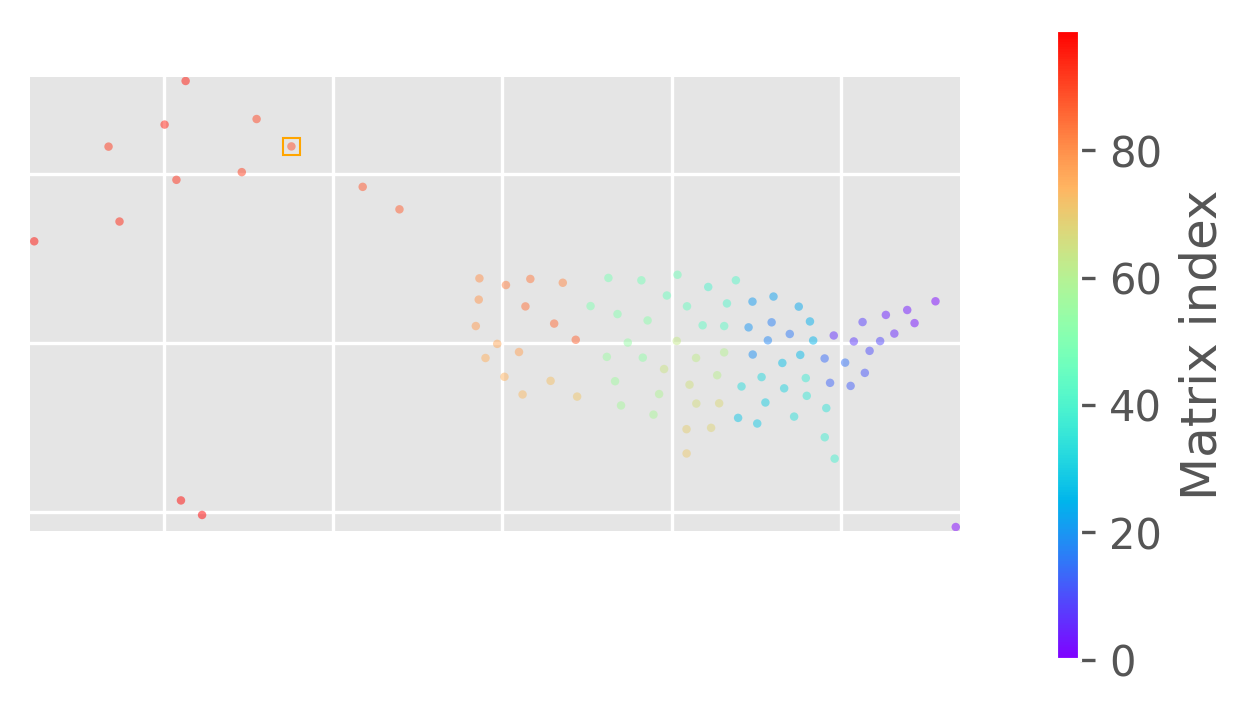

In [5]:
id_to_plot(df_clusters, 89)

In [6]:
# sort by population
df = df_clusters.sort_values('population').reset_index(drop=True)
df.loc[52]

leaves                                                          7
X                                                      -90.937921
Y                                                       41.841944
cbg_clusters    [492, 493, 494, 495, 496, 497, 498, 526, 527, ...
population                                              2030826.0
Name: 52, dtype: object

In [7]:
df = df_clusters.sort_values('population', ascending=False).reset_index()
df.head(15)

,index,leaves,X,Y,cbg_clusters,population
0,5,51,-73.724206,41.108112,"[40, 105, 106, 107, 108, 109, 110, 111, 112, 1...",23501231.0
1,73,27,-117.627642,33.916072,"[932, 941, 942, 943, 944, 945, 946, 947, 948, ...",21962487.0
2,17,52,-88.216370,42.438098,"[380, 381, 382, 383, 384, 385, 386, 387, 388, ...",12902716.0
3,75,63,-122.006895,38.222576,"[903, 904, 905, 908, 909, 910, 911, 912, 913, ...",12140175.0
4,10,26,-76.646393,39.068366,"[68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 7...",10817665.0
5,38,76,-81.940209,28.863102,"[178, 457, 458, 459, 460, 461, 462, 463, 464, ...",10500311.0
6,9,68,-75.400850,40.219861,"[89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 1...",9884389.0
7,2,10,-71.336910,42.342783,"[19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 3...",9551237.0
8,39,9,-80.771468,26.338262,"[454, 455, 456, 474, 475, 476, 477, 478, 479, ...",8057252.0
9,66,28,-97.108652,32.843516,"[651, 654, 673, 674, 675, 676, 677, 678, 679, ...",7948360.0


In [8]:
df_clusters.sort_values('population', ascending=True).reset_index().head(15)

,index,leaves,X,Y,cbg_clusters,population
0,97,29,-175.298792,52.005047,[1016],1004.0
1,96,98,-157.420288,70.938534,[1001],5032.0
2,94,58,-165.227478,54.339976,"[1014, 1015]",5616.0
3,95,42,-159.902818,65.789059,"[1004, 1005, 1006, 1012]",13910.0
4,89,15,-144.925035,63.211651,"[995, 996, 997, 998, 999]",18898.0
5,92,3,-166.524080,63.186591,"[1002, 1003, 1008]",19924.0
6,93,5,-158.507229,59.265863,"[1007, 1009, 1010, 1011, 1013]",23323.0
7,87,25,-132.166652,55.780676,"[984, 985]",25686.0
8,88,93,-136.509188,58.435309,"[986, 987, 988]",47740.0
9,49,95,-107.492255,47.680256,"[810, 814, 819, 820]",88958.0


## Start ploting

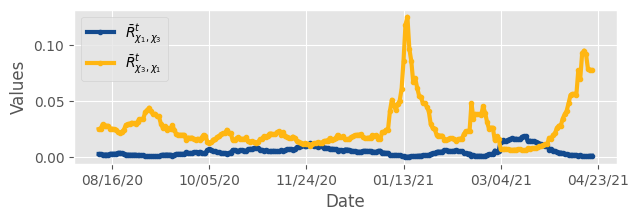

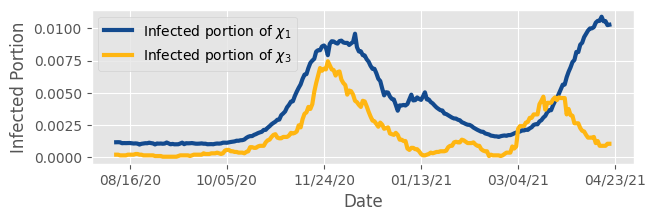

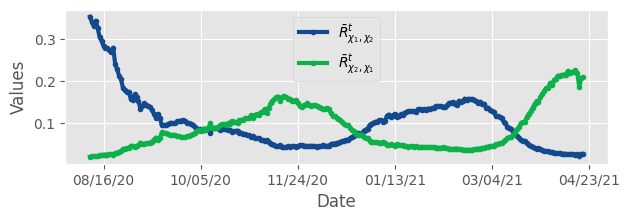

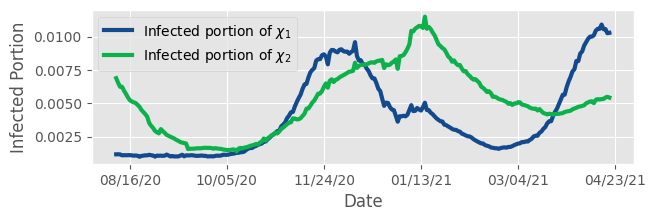

In [14]:
########################
##### Parameter settings
########################
date = df_confirmed_case.columns.to_list()
days = [datetime.datetime.strptime(date[i], '%m/%d/%y') for i in range(len(date))]
linewidth = 3
markersize = 6
fontsize = 12
start_index = 200

#### loop through eff_rep_num_list
#plot_dist_rep(eff_rep_num_list, 66, [39, 24, 5, 75, 97, 96, 89, 95, 13])
node1 = 24
node2 = 89
node1_inf_portion = get_portion_time_series(df_inf_portion, node1)
node2_inf_portion = get_portion_time_series(df_inf_portion, node2)
edge21 = get_rep_num_time_series(eff_rep_num_list, node1, node2)
edge12 = get_rep_num_time_series(eff_rep_num_list, node2, node1)

fig1 = plt.figure(figsize=(7,2))
ax1 = fig1.add_subplot(111)
ax1.plot(days[start_index:], edge21[start_index:], marker='.', color = '#134A8E', linewidth=linewidth, markersize=markersize, label=r"$\bar{R}_{\chi_1,\chi_3}^t$")
ax1.plot(days[start_index:], edge12[start_index:], marker='.', color = '#FFB612', linewidth=linewidth, markersize=markersize, label=r"$\bar{R}_{\chi_3,\chi_1}^t$")
ax1.set_xlabel('Date', fontsize=fontsize)
ax1.set_ylabel(r'Values', fontsize=fontsize)
ax1.legend()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%y'))
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=50))

fig2 = plt.figure(figsize=(7,2))
ax2 = fig2.add_subplot(111)
ax2.plot(days[start_index:], node1_inf_portion[start_index:], color = '#134A8E', linestyle='-', linewidth=linewidth, label=r"Infected portion of $\chi_1$")
ax2.plot(days[start_index:], node2_inf_portion[start_index:], color = '#FFB612', linestyle='-', linewidth=linewidth, label=r"Infected portion of $\chi_3$")
ax2.set_xlabel('Date', fontsize=fontsize)
ax2.set_ylabel('Infected Portion', fontsize=fontsize)
ax2.legend()
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%y'))
ax2.xaxis.set_major_locator(mdates.DayLocator(interval=50))

node1 = 24
node2 = 39
node1_inf_portion = get_portion_time_series(df_inf_portion, node1)
node2_inf_portion = get_portion_time_series(df_inf_portion, node2)
edge21 = get_rep_num_time_series(eff_rep_num_list, node1, node2)
edge12 = get_rep_num_time_series(eff_rep_num_list, node2, node1)

fig3 = plt.figure(figsize=(7,2))
ax3 = fig3.add_subplot(111)
ax3.plot(days[start_index:], edge21[start_index:], marker='.', color = '#134A8E', linewidth=linewidth, markersize=markersize, label=r"$\bar{R}_{\chi_1,\chi_2}^t$")
ax3.plot(days[start_index:], edge12[start_index:], marker='.', color = '#0DB14B', linewidth=linewidth, markersize=markersize, label=r"$\bar{R}_{\chi_2,\chi_1}^t$")
ax3.set_xlabel('Date', fontsize=fontsize)
ax3.set_ylabel('Values', fontsize=fontsize)
ax3.legend()
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%y'))
ax3.xaxis.set_major_locator(mdates.DayLocator(interval=50))

fig4 = plt.figure(figsize=(7,2))
ax4 = fig4.add_subplot(111)
ax4.plot(days[start_index:], node1_inf_portion[start_index:], color = '#134A8E', linestyle='-', linewidth=linewidth, label=r"Infected portion of $\chi_1$")
ax4.plot(days[start_index:], node2_inf_portion[start_index:], color = '#0DB14B', linestyle='-', linewidth=linewidth, label=r"Infected portion of $\chi_2$")
ax4.set_xlabel('Date', fontsize=fontsize)
ax4.set_ylabel('Infected Portion', fontsize=fontsize)
ax4.legend()
ax4.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%y'))
ax4.xaxis.set_major_locator(mdates.DayLocator(interval=50))


Written file: /home/python/shared/figures/inf_portion_selected_regions.png
Written file: /home/python/shared/figures/inf_portion_selected_regions.svg


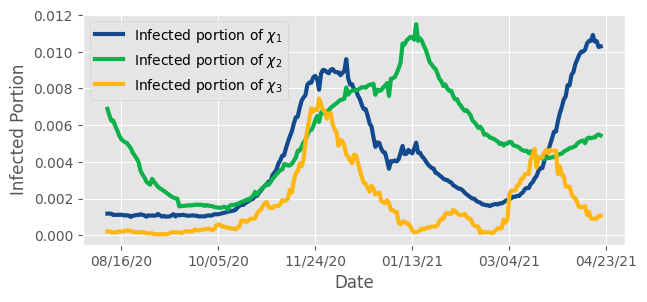

In [29]:
node1 = 24
node2 = 39
node3 = 89

# get infected portion
node1_inf_portion = get_portion_time_series(df_inf_portion, node1)
node2_inf_portion = get_portion_time_series(df_inf_portion, node2)
node3_inf_portion = get_portion_time_series(df_inf_portion, node3)

fig2 = plt.figure(figsize=(7,3))
ax2 = fig2.add_subplot(111)
ax2.plot(days[start_index:], node1_inf_portion[start_index:], color = '#134A8E', linestyle='-', linewidth=linewidth, label=r"Infected portion of $\chi_1$")
ax2.plot(days[start_index:], node2_inf_portion[start_index:], color = '#0DB14B', linestyle='-', linewidth=linewidth, label=r"Infected portion of $\chi_2$")
ax2.plot(days[start_index:], node3_inf_portion[start_index:], color = '#FFB612', linestyle='-', linewidth=linewidth, label=r"Infected portion of $\chi_3$")
ax2.set_xlabel('Date', fontsize=fontsize)
ax2.set_ylabel('Infected Portion', fontsize=fontsize)
ax2.legend()
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%y'))
ax2.xaxis.set_major_locator(mdates.DayLocator(interval=50))

# Save this pic
fname = 'inf_portion_selected_regions'
exts = ['.png', '.svg']
dpi=300

for ext in exts:
    filepath = os.path.join(fig_dir, fname+ext)
    fig2.savefig(filepath, bbox_inches='tight', pad_inches=0, dpi=dpi)
    print("Written file: {:s}".format(str(filepath)))


Written file: /home/python/shared/figures/Distributed_rep_numbers_Det_Alk.png
Written file: /home/python/shared/figures/Distributed_rep_numbers_Det_Alk.svg
Written file: /home/python/shared/figures/Distributed_rep_numbers_Det_Mia.png
Written file: /home/python/shared/figures/Distributed_rep_numbers_Det_Mia.svg


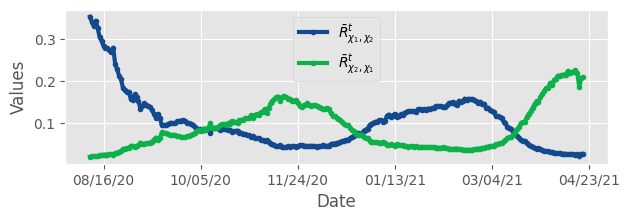

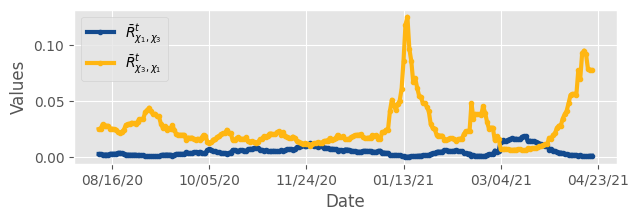

In [30]:
edge21 = get_rep_num_time_series(eff_rep_num_list, node1, node2)
edge12 = get_rep_num_time_series(eff_rep_num_list, node2, node1)
edge31 = get_rep_num_time_series(eff_rep_num_list, node1, node3)
edge13 = get_rep_num_time_series(eff_rep_num_list, node3, node1)

fig3 = plt.figure(figsize=(7,2))
ax3 = fig3.add_subplot(111)
ax3.plot(days[start_index:], edge21[start_index:], marker='.', color = '#134A8E', linewidth=linewidth, markersize=markersize, label=r"$\bar{R}_{\chi_1,\chi_2}^t$")
ax3.plot(days[start_index:], edge12[start_index:], marker='.', color = '#0DB14B', linewidth=linewidth, markersize=markersize, label=r"$\bar{R}_{\chi_2,\chi_1}^t$")
ax3.set_xlabel('Date', fontsize=fontsize)
ax3.set_ylabel('Values', fontsize=fontsize)
ax3.legend()
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%y'))
ax3.xaxis.set_major_locator(mdates.DayLocator(interval=50))

# Save this pic
fname = 'Distributed_rep_numbers_Det_Alk'
exts = ['.png', '.svg']
dpi=300

for ext in exts:
    filepath = os.path.join(fig_dir, fname+ext)
    fig3.savefig(filepath, bbox_inches='tight', pad_inches=0, dpi=dpi)
    print("Written file: {:s}".format(str(filepath)))

fig1 = plt.figure(figsize=(7,2))
ax1 = fig1.add_subplot(111)
ax1.plot(days[start_index:], edge31[start_index:], marker='.', color = '#134A8E', linewidth=linewidth, markersize=markersize, label=r"$\bar{R}_{\chi_1,\chi_3}^t$")
ax1.plot(days[start_index:], edge13[start_index:], marker='.', color = '#FFB612', linewidth=linewidth, markersize=markersize, label=r"$\bar{R}_{\chi_3,\chi_1}^t$")
ax1.set_xlabel('Date', fontsize=fontsize)
ax1.set_ylabel(r'Values', fontsize=fontsize)
ax1.legend()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%y'))
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=50))

# Save this pic
fname = 'Distributed_rep_numbers_Det_Mia'
exts = ['.png', '.svg']
dpi=300

for ext in exts:
    filepath = os.path.join(fig_dir, fname+ext)
    fig1.savefig(filepath, bbox_inches='tight', pad_inches=0, dpi=dpi)
    print("Written file: {:s}".format(str(filepath)))

In [9]:
eff_rep_num_list

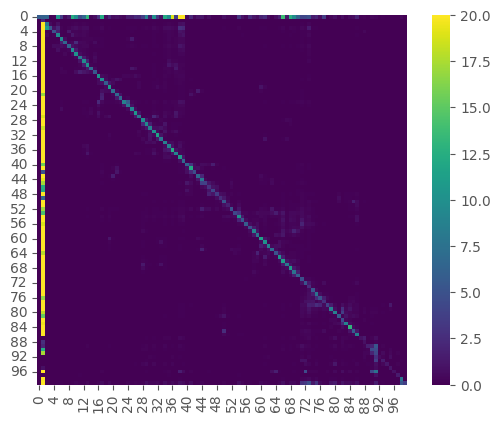

In [10]:
import matplotlib.colors as mco
import seaborn as sns

fig = sns.heatmap(eff_rep_num_list[200].eff_rep_num_mat, vmax=20, square=True, cmap="viridis")

In [11]:
eff_rep_num_list[200].eff_rep_num_mat

array([[5.84272322e+00, 6.15431829e+00, 6.42655913e+00, ...,
        0.00000000e+00, 3.75923597e-01, 1.85538031e-03],
       [0.00000000e+00, 2.13728979e+00, 2.29801841e-17, ...,
        0.00000000e+00, 1.08817871e-19, 2.29643121e-21],
       [1.36262695e-06, 2.00000000e+01, 8.01505475e+00, ...,
        4.18792856e-04, 5.39428582e-03, 3.28512339e-04],
       ...,
       [0.00000000e+00, 0.00000000e+00, 4.53231651e-04, ...,
        1.45853489e+00, 1.72543586e-02, 2.18832813e-04],
       [7.84576237e-07, 1.97921445e+01, 8.65802985e-03, ...,
        1.56404505e-02, 7.51674554e+00, 2.24437647e-02],
       [2.38905315e-05, 2.00000000e+01, 7.89235257e-02, ...,
        8.09897420e-02, 5.31919017e+00, 3.63531472e+00]])

Looks good! We are going to choose clusters with id 24, 39, 89

## Simplify the distributed reproduction number matrix

We will simplify the distributed reproduction number matrix from the first clustering, to a matrix that only contains subcommunities that contribute to cluster 24, 39, 89

In [12]:
# open result file from clustering 
complevel=7
complib='zlib'
key_base = Path("/first_clustering")
with pd.HDFStore(epi_resfile, complevel=complevel, complib=complib) as store:
    print(f"File {epi_resfile} has {len(store.keys())} entries.")

    ########################################################
    ##### Load clustering and the corresponding csse results
    ########################################################
    # cluster information
    key = str(key_base / 'basic' / "cluster")
    df_clusters_first = store[key]

    #############################
    ##### population related data
    #############################
    # infected portion
    key = str(key_base / "population" / "infected_portion")
    df_inf_portion_first = store[key]

File /home/python/shared/results/epi_analysis.hdf5 has 12 entries.


In [13]:
# reproduction numbers
base_path = os.path.join(os.path.abspath(os.path.join("__file__", '..', '..', 'results')))
save_file_name = 'rep_num_exp.pkl'
save_str = os.path.abspath(os.path.join(base_path, 
                                            save_file_name))   

with open(save_str, 'rb') as f:
    rep_num_logger = pickle.load(f)
    dataCollection_1023 = rep_num_logger["effective_reproduction_number_matrix"]

In [14]:
node1 = 24
node2 = 39
node3 = 89
n_cluster_list = [node1, node2, node3]
m = len(n_cluster_list)

# the index of subcommunities that consist of this node
node1_list = df_clusters.loc[node1]['cbg_clusters']
node2_list = df_clusters.loc[node2]['cbg_clusters']
node3_list = df_clusters.loc[node3]['cbg_clusters']
n_list = node1_list + node2_list + node3_list
n = len(n_list)

# create a map from current id to cluster id
simpId2cluId = dict()
for i in range(n):
    simpId2cluId[i] = n_list[i]

# Get the simplified distributed reproduction number
dCollection_simplified_1023 = dataCollection()
for rep_num in dataCollection_1023:
    new_rep_num = np.zeros((n,n))
    
    for i in range(n):  
        for j in range(n):
            new_rep_num[i][j] = rep_num.eff_rep_num_mat[n_list[i], n_list[j]]
    
    dCollection_simplified_1023.add(distRepNum(new_rep_num))

In [15]:
# here we do column clustering
dCollection_simplified_1023_w_col_sum = dataCollection()   # Dimension: 455 where each element is an array of size (n, m).
for rep_num in dCollection_simplified_1023:
    new_rep_num = np.zeros((n,m))

    for i in range(n):
        for j in range(n):
            if simpId2cluId[j] in node1_list:
                new_rep_num[i][0] += rep_num.eff_rep_num_mat[i, j]
            elif simpId2cluId[j] in node2_list:
                new_rep_num[i][1] += rep_num.eff_rep_num_mat[i, j]
            elif simpId2cluId[j] in node3_list:
                new_rep_num[i][2] += rep_num.eff_rep_num_mat[i, j]

    dCollection_simplified_1023_w_col_sum.add(distRepNum(new_rep_num))


array([[7.43174020e+00, 3.26294833e-02, 2.59823855e-03],
       [8.79084515e+00, 7.31083497e-02, 4.52260048e-03],
       [1.21852451e+01, 1.14467315e-01, 2.69878385e-03],
       [1.59054615e+01, 1.31051775e-01, 1.90365556e-02],
       [1.63825848e+01, 6.78139652e-02, 2.04334460e-03],
       [1.15366420e+01, 8.90102457e-02, 3.97786595e-03],
       [1.48942230e+01, 1.39972322e-01, 1.77814589e-03],
       [1.36400415e+01, 1.61874629e-01, 1.89351341e-03],
       [1.18059504e+01, 7.41849049e-02, 2.43081861e-04],
       [1.16139228e+01, 8.33433720e-02, 1.48847247e-02],
       [6.93197803e+00, 1.01695118e-01, 8.68199398e-04],
       [3.79395332e+00, 3.10070591e-02, 1.59119000e-03],
       [7.48975285e+00, 7.42227642e-02, 4.40915478e-03],
       [6.41107421e+00, 7.87613929e-02, 9.56688774e-04],
       [4.83835450e+00, 4.95215769e-02, 8.19560915e-05],
       [8.07717054e+00, 4.96322629e-02, 5.99073942e-04],
       [3.09796461e-01, 7.66496820e+00, 3.48384642e-03],
       [2.98688594e-01, 9.52030

In [26]:
dCollection_simplified_1023_w_col_sum[201].eff_rep_num_mat

array([[6.11198056e+00, 1.22486863e-01, 1.20957085e-03],
       [1.85868442e+01, 6.46449862e-01, 1.20178794e-02],
       [1.88934580e+01, 9.44499204e-01, 3.67401535e-03],
       [1.20301950e+01, 4.36356497e-01, 1.53719828e-02],
       [2.79752733e+02, 1.38949052e+02, 2.04334460e-03],
       [4.09747846e+00, 1.14712215e-01, 7.18602427e-04],
       [2.78119190e+02, 1.47959775e+02, 4.16534783e-01],
       [5.81813616e+00, 2.68450155e-01, 5.94918251e-04],
       [1.82916529e+01, 5.21114185e-01, 0.00000000e+00],
       [1.22439682e+01, 6.16328858e-01, 4.01412977e-03],
       [5.41183774e+00, 2.34514620e-01, 2.52544257e-04],
       [6.22685131e+00, 1.72680352e-01, 2.66006936e-03],
       [9.01474015e+00, 5.29837160e-01, 8.53969772e-03],
       [8.54867241e+00, 7.83566340e-01, 0.00000000e+00],
       [5.48885459e+00, 3.91548074e-01, 0.00000000e+00],
       [8.21665369e+00, 3.04744699e-01, 0.00000000e+00],
       [1.06767200e-01, 8.58689054e+00, 5.89803338e-04],
       [1.06003783e-01, 1.11940

In [16]:
def func(M : int,
         population: np.ndarray,
         firstClu2SecondClu: dict, 
         simpId2cluId: dict,
         inf_portion: np.ndarray, 
         eff_rep_num_mat_list: list,
         n_list: list,
         clip_value: int = 20) -> dataCollection:
    """
    Get the distributed effective reproduction number after the second clustering

    Input:
        - M: int, number of clusters we are interested in.
        - population: numpy.ndarray. Population of clusters. N by 1, where N -> number of clusters.
        - firstClu2SecondClu: dictionary, the map from the cluster_id after the first clustering 
            to the cluster_id after the second clustering. Length: N -> the number of clusters after first clustering
        - sus_portion: suspected portion after the first clustering. Dimension: N by D.
            M -> the number of clusters after first clustering, D -> number of dates.
        - eff_rep_num_mat_list: a list of effective repreductive number matrices with length D
        - n_list: list of subcommunities that contribute to the clusters we are interested in.
        - clip_value: int. A cap for reproduction number.

    Output:
        - res: a list of effective repreductive number matrices after second clustering with length D.
    """
    N = inf_portion.shape[0] # the number of clusters after first clustering
    D = inf_portion.shape[1]  # number of days
    
    # initialize
    res = dataCollection()
    
    for d in range(D):
        eff_mat = np.zeros((M,M))
        eff_mat_prev = eff_rep_num_mat_list[d].eff_rep_num_mat
        denomiator = np.zeros(M)
        
        for x in range(N):
            for y in range(N):
                map_x = firstClu2SecondClu[simpId2cluId[x]]
                map_y = firstClu2SecondClu[simpId2cluId[y]]

                # map_x to eff_mat index
                for i, node in enumerate(n_list):
                    if map_x == node:
                        map_x = i
                    if map_y == node:
                        map_y = i
                
                if (inf_portion[x][d] == 0):
                    # if the infected portion is 0, we assume at lease one person is
                    # infected to prevent computational problem
                    eff_mat[map_x][map_y] += (1.0 / population[x]) * eff_mat_prev[x][y]
                else:
                    eff_mat[map_x][map_y] += inf_portion[x][d] * eff_mat_prev[x][y]

            if (inf_portion[x][d] == 0):
                # Similarly, we assume at lease one person is
                # infected to prevent computational problem
                denomiator[map_x] += (1.0 / population[x])
            else:
                denomiator[map_x] += inf_portion[x][d]

        for i in range(M):
            eff_mat[i, :] = eff_mat[i, :] / denomiator[i]

        eff_mat = np.clip(eff_mat, 0, clip_value)
        res.add(distRepNum(eff_mat))

    return res

In [17]:
population = df_clusters_first[df_clusters_first.index.isin(n_list)]['population'].to_numpy()
inf_p = df_inf_portion_first[df_clusters_first.index.isin(n_list)].to_numpy()

In [18]:
inf_p.shape

(33, 455)

In [19]:
res = func(M = 3, 
           population = population, 
           firstClu2SecondClu = firstClu2SecondClu, 
           simpId2cluId = simpId2cluId,
           inf_portion = inf_p, 
           eff_rep_num_mat_list=dCollection_simplified_1023,
           n_list=n_cluster_list)
res[0].eff_rep_num_mat

array([[8.37960197e+00, 6.54828602e-02, 3.46783059e-03],
       [1.44283877e-01, 6.66978683e+00, 2.76977939e-03],
       [9.65804251e-03, 1.03568010e-02, 1.69122261e+00]])

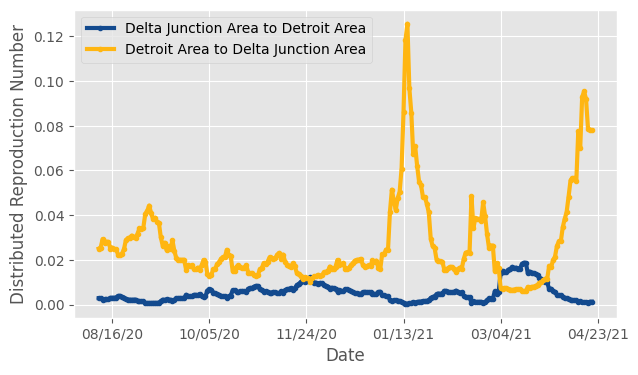

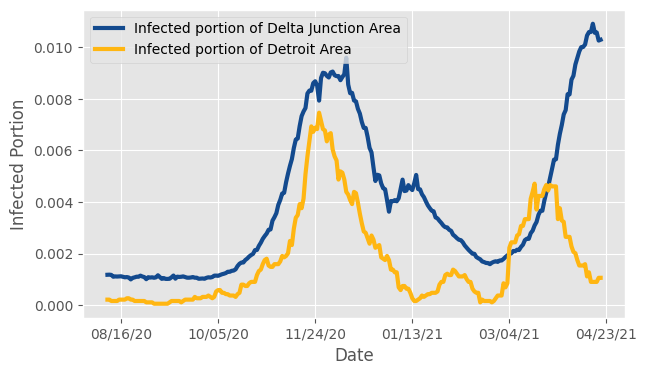

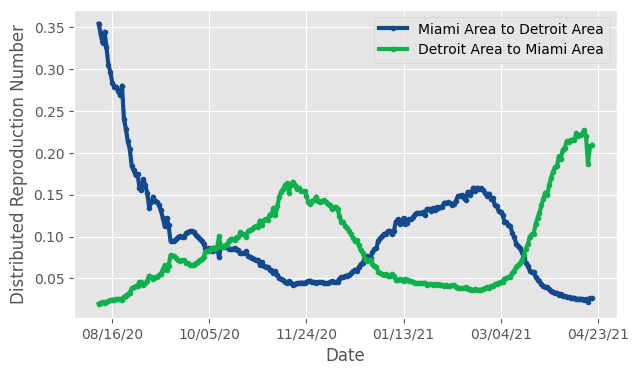

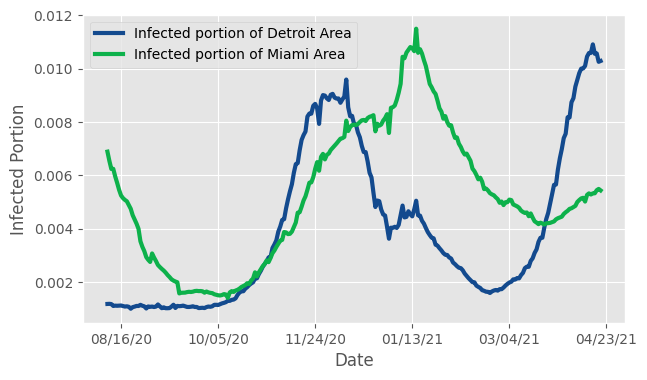

In [20]:
########################
##### Parameter settings
########################
date = df_confirmed_case.columns.to_list()
days = [datetime.datetime.strptime(date[i], '%m/%d/%y') for i in range(len(date))]
linewidth = 3
markersize = 6
fontsize = 12
start_index = 200

#### loop through eff_rep_num_list
#plot_dist_rep(eff_rep_num_list, 66, [39, 24, 5, 75, 97, 96, 89, 95, 13])
node1_id = 0
node2_id = 2
node1_inf_portion = get_portion_time_series(df_inf_portion, node1)
node2_inf_portion = get_portion_time_series(df_inf_portion, node3)
edge21 = get_rep_num_time_series(res, node1_id, node2_id)
edge12 = get_rep_num_time_series(res, node2_id, node1_id)

fig1 = plt.figure(figsize=(7,4))
ax1 = fig1.add_subplot(111)
ax1.plot(days[start_index:], edge21[start_index:], marker='.', color = '#134A8E', linewidth=linewidth, markersize=markersize, label=f"Delta Junction Area to Detroit Area")
ax1.plot(days[start_index:], edge12[start_index:], marker='.', color = '#FFB612', linewidth=linewidth, markersize=markersize, label=f"Detroit Area to Delta Junction Area")
ax1.set_xlabel('Date', fontsize=fontsize)
ax1.set_ylabel('Distributed Reproduction Number', fontsize=fontsize)
ax1.legend()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%y'))
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=50))

fig2 = plt.figure(figsize=(7,4))
ax2 = fig2.add_subplot(111)
ax2.plot(days[start_index:], node1_inf_portion[start_index:], color = '#134A8E', linestyle='-', linewidth=linewidth, label=f"Infected portion of Delta Junction Area")
ax2.plot(days[start_index:], node2_inf_portion[start_index:], color = '#FFB612', linestyle='-', linewidth=linewidth, label=f"Infected portion of Detroit Area")
ax2.set_xlabel('Date', fontsize=fontsize)
ax2.set_ylabel('Infected Portion', fontsize=fontsize)
ax2.legend()
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%y'))
ax2.xaxis.set_major_locator(mdates.DayLocator(interval=50))

node1_id = 0
node2_id = 1
node1_inf_portion = get_portion_time_series(df_inf_portion, node1)
node2_inf_portion = get_portion_time_series(df_inf_portion, node2)
edge21 = get_rep_num_time_series(res, node1_id, node2_id)
edge12 = get_rep_num_time_series(res, node2_id, node1_id)

fig3 = plt.figure(figsize=(7,4))
ax3 = fig3.add_subplot(111)
ax3.plot(days[start_index:], edge21[start_index:], marker='.', color = '#134A8E', linewidth=linewidth, markersize=markersize, label=f"Miami Area to Detroit Area")
ax3.plot(days[start_index:], edge12[start_index:], marker='.', color = '#0DB14B', linewidth=linewidth, markersize=markersize, label=f"Detroit Area to Miami Area")
ax3.set_xlabel('Date', fontsize=fontsize)
ax3.set_ylabel('Distributed Reproduction Number', fontsize=fontsize)
ax3.legend()
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%y'))
ax3.xaxis.set_major_locator(mdates.DayLocator(interval=50))

fig4 = plt.figure(figsize=(7,4))
ax4 = fig4.add_subplot(111)
ax4.plot(days[start_index:], node1_inf_portion[start_index:], color = '#134A8E', linestyle='-', linewidth=linewidth, label=f"Infected portion of Detroit Area")
ax4.plot(days[start_index:], node2_inf_portion[start_index:], color = '#0DB14B', linestyle='-', linewidth=linewidth, label=f"Infected portion of Miami Area")
ax4.set_xlabel('Date', fontsize=fontsize)
ax4.set_ylabel('Infected Portion', fontsize=fontsize)
ax4.legend()
ax4.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%y'))
ax4.xaxis.set_major_locator(mdates.DayLocator(interval=50))


In [21]:
logger = {}
logger['node_id_map_to'] = n_cluster_list
logger['node_id_map_from'] = n_list
logger['simpId2cluId'] = simpId2cluId
logger['simplified_data_collection_1023'] = dCollection_simplified_1023
logger['simplified_data_collection_1023_w_col_sum'] = dCollection_simplified_1023_w_col_sum
logger['population'] = population
logger['infected_portion'] = inf_p
logger['firstClu2SecondClu'] = firstClu2SecondClu
logger['simplifed_effective_reproduction_number_matrix_100'] = res
logger['exp_name'] = 'simplied_eff_matrix'

# save file
save_folder_str = os.path.join(os.path.abspath(os.path.join("__file__", '..', '..','results')))
save_file_name = logger['exp_name'] + 'test' + '.pkl'
save_str = os.path.abspath(os.path.join(save_folder_str, 
                                            save_file_name))   
with open(save_str, 'wb') as f:
    pickle.dump(logger, f, protocol=pickle.HIGHEST_PROTOCOL)